In [1]:
# original source code uppon which this was built on : https://github.com/MichaelE919/machine-learning-predict-weather/blob/master/Neural%20Network%20Prediction.ipynb
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# read in the csv data into a pandas data frame
df = pd.read_csv('wind_energy.csv', names=['Date', 'Time', 'Output1', 'Output2', 'Output3', 'Total'], skipinitialspace=True, skiprows=1, engine="python")
df.describe()

,Output1,Output2,Output3,Total
count,49820.000000,49820.000000,49820.000000,49820.000000
mean,-2.171060,-1.177493,-0.725205,3.029627
std,2.658037,1.659726,1.165067,6.909441
min,-15.500000,-10.700000,-7.900000,-30.900000
25%,-3.100000,-1.600000,-1.000000,-0.200000
50%,-1.200000,-0.600000,-0.300000,4.700000
75%,-0.200000,0.000000,0.000000,7.700000
max,13.700000,14.000000,6.900000,21.800000


In [3]:
df.index = df.index.values.astype(float)

In [4]:
# read in the csv data into a pandas data frame and set column headers
df1 = pd.read_csv('solar_energy.csv', names=['Date', 'Time', 'Energy_Produced'], skipinitialspace=True, skiprows=1, engine="python")
df1. describe()

,Energy_Produced
count,99240.000000
mean,5798.256949
std,74628.005327
min,-331554.719000
25%,1704.140750
50%,30527.532500
75%,47567.250000
max,137311.078000


In [5]:
df1.index = df1.index.values.astype(float)

In [6]:
# read in the csv data into a pandas data frame and set column headers
df2 = pd.read_csv('weather_data_10.csv', names=['Date', 'Time', 'TempC', 'Wind_Dir_deg', 'Wind_Speed', 'Sunshine_time', 'Air-pressure', 'Precipitation'], skipinitialspace=True, skiprows=1, engine="python")
df2.describe()

,TempC,Wind_Dir_deg,Wind_Speed,Sunshine_time,Air-pressure,Precipitation
count,65952.000000,65952.000000,65952.000000,65952.000000,65952.000000,65952.000000
mean,115.493647,18.543031,32.032888,1.820203,9976.459941,0.160723
std,75.029089,8.479291,19.790552,3.600284,89.061355,1.283361
min,-175.000000,0.000000,0.000000,0.000000,9458.000000,0.000000
25%,64.000000,12.000000,16.000000,0.000000,9920.000000,0.000000
50%,121.000000,20.000000,29.000000,0.000000,9974.000000,0.000000
75%,169.000000,25.000000,44.000000,0.000000,10031.000000,0.000000
max,340.000000,36.000000,146.000000,10.000000,10214.000000,101.000000


In [7]:
df2.index = df2.index.values.astype(float)

In [8]:
# read in the csv data into a pandas data frame
# assign all the columns names and drop Date and Time
df3 = pd.read_csv('weather_data_60.csv', names=['Date', 'Time', 'TempC', 'Wind_Dir_deg', 'Wind_Speed', 'Sunshine_time', 'Air-pressure', 'Precipitation', 'Info'], skipinitialspace=True, skiprows=1, engine="python")
df3 = df3.drop('Date', axis=1)
df3 = df3.drop('Time', axis=1)

#convert all the values to float64s
df3['TempC'] = df3['TempC'].astype(float)
df3['Wind_Dir_deg'] = df3['Wind_Dir_deg'].astype(float)
df3['Wind_Speed'] = df3['Wind_Speed'].astype(float)
df3['Sunshine_time'] = df3['Sunshine_time'].astype(float)
df3['Air-pressure'] = df3['Air-pressure'].astype(float)
df3['Precipitation'] = df3['Precipitation'].astype(float)
df3['Info'] = df3['Info'].astype(float)
df3.describe()

,TempC,Wind_Dir_deg,Wind_Speed,Sunshine_time,Air-pressure,Precipitation,Info
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,5.516830,18.556041,32.018013,115.470524,9976.463974,11.139556,0.980349
std,2.958373,8.498436,19.831738,75.012986,89.050301,20.394057,5.188835
min,-9.000000,0.000000,0.000000,-173.000000,9463.000000,0.000000,0.000000
25%,3.000000,12.000000,15.000000,64.000000,9920.000000,0.000000,0.000000
50%,7.000000,20.000000,29.000000,121.000000,9974.500000,0.000000,0.000000
75%,8.000000,25.000000,45.000000,169.000000,10031.000000,11.000000,0.000000
max,8.000000,36.000000,146.000000,339.000000,10213.000000,60.000000,257.000000


In [9]:
# read in the csv data into a pandas data frame 
df4 = pd.read_csv('weather_forecast.csv', names=['Date', 'Time', 'ForDate', 'ForTime', 'TempC', 'Dew_point', 'Wind_Speed', 'Gust_Speed', 'Air_Pressure', 'Percent_of_Rain', 'Cloud_Coverage', 'Solar_Irradiance', 'Wind_Dir', 'Air_Humidity', 'Air_Density'], skipinitialspace=True, skiprows=1, engine="python")
df4 = df4.drop('Time',axis=1)
df4 = df4.drop('ForTime',axis=1)
df4 = df4.drop('Date',axis=1)
df4 = df4.drop('ForDate',axis=1)

#convert all the values to float64s
#fill empty values with the fillna() function
df4['Percent_of_Rain'] = df4['Percent_of_Rain'].astype(float)
df4['Cloud_Coverage'] = df4['Cloud_Coverage'].astype(float)
df4['Solar_Irradiance'] = df4['Solar_Irradiance'].astype(float)
df4['Wind_Dir'] = df4['Wind_Dir'].astype(float)
df4['Air_Humidity'] = df4['Air_Humidity'].astype(float)
df4['TempC'] = df4['TempC'].fillna(10.176848)
df4['Dew_point'] = df4['Dew_point'].fillna(6.474721)
df4['Air_Pressure'] = df4['Air_Pressure'].fillna(996.786995)
df4['Gust_Speed'] = df4['Gust_Speed'].fillna(5.560375)
df4['Wind_Speed'] = df4['Wind_Speed'].fillna(2.783592)
df4['Air_Density'] = df4['Air_Density'].fillna(1.233240)
df4.describe()

,TempC,Dew_point,Wind_Speed,Gust_Speed,Air_Pressure,Percent_of_Rain,Cloud_Coverage,Solar_Irradiance,Wind_Dir,Air_Humidity,Air_Density
count,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000,112528.000000
mean,10.176848,6.474721,2.783592,5.560375,996.786995,22.163462,57.826719,134.672739,185.217093,77.860861,1.233240
std,7.277174,6.228837,1.457356,2.724937,8.460726,25.506545,34.480756,211.778709,77.740960,13.491201,0.037053
min,-13.600000,-18.300000,0.000000,0.000000,952.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.134000
25%,5.100000,2.500000,1.700000,3.600000,991.500000,2.000000,38.000000,0.000000,121.000000,70.000000,1.206000
50%,10.300000,7.000000,2.600000,5.100000,996.900000,10.000000,63.000000,0.000000,199.000000,81.000000,1.230000
75%,15.600000,11.300000,3.700000,7.200000,1002.100000,37.000000,88.000000,209.000000,245.000000,88.000000,1.258000
max,33.900000,20.400000,10.800000,19.500000,1020.300000,99.000000,100.000000,1148.000000,360.000000,99.000000,1.377000


In [10]:
# merge the csv data from the two dataframes of solar-energy and weather-info-10
# drop the time and dates of the merged files
df5 = pd.merge(df1, df2, how='left', left_index=True, right_index=True)
df5 = df5.drop('Date_x',axis=1)
df5 = df5.drop('Time_x',axis=1)
df5 = df5.drop('Date_y',axis=1)
df5 = df5.drop('Time_y',axis=1)

In [11]:
#conveert the values of the columns into float64s
df5['TempC'] = df5['TempC'].fillna(0)
df5['Wind_Dir_deg'] = df5['Wind_Dir_deg'].fillna(18.543031)
df5['Wind_Speed'] = df5['Wind_Speed'].fillna(32.032888)
df5['Sunshine_time'] = df5['Sunshine_time'].fillna(1.820203)
df5['Air-pressure'] = df5['Air-pressure'].fillna(9976.459941)
df5['Precipitation'] = df5['Precipitation'].fillna(0.160723)

In [12]:
# merge the csv data from the two dataframes of wind-energy and weather-info-10
# drop the time and dates of the merged files
df6 = pd.merge(df, df2, how='left', left_index=True, right_index=True)
df6 = df6.drop('Date_x', axis=1)
df6 = df6.drop('Time_x', axis=1)
df6 = df6.drop('Date_y', axis=1)
df6 = df6.drop('Time_y', axis=1)
#filling NaN values with the mean of the corresponding column
df6['Output1'] = df6['Output1'].fillna(-2.171060)
df6['Output2'] = df6['Output2'].fillna(-1.177493)
df6['Output3'] = df6['Output3'].fillna(-0.725205)
df6['Total'] = df6['Total'].fillna(3.029627)
df6['TempC'] = df6['TempC'].astype(float)
df6['Wind_Dir_deg'] = df6['Wind_Dir_deg'].astype(float)
df6['Wind_Speed'] = df6['Wind_Speed'].astype(float)
df6['Sunshine_time'] = df6['Sunshine_time'].astype(float)
df6['Air-pressure'] = df6['Air-pressure'].astype(float)
df6['Precipitation'] = df6['Precipitation'].astype(float)

In [13]:
# merge the csv data from the two dataframes of soalr-energy and weather-forecast
# drop the time and dates of the merged files
#filling the empty values with the mean of the corresponding column
df7 = pd.merge(df4, df1, how='left', left_index=True, right_index=True) 
df7 = df7.drop('Date', axis=1)
df7 = df7.drop('Time', axis=1)
df7['Energy_Produced'] = df7['Energy_Produced'].fillna(5798.256949)

In [14]:
# merge the csv data from the two dataframes of wind-energy and weather-forecast
# drop the time and dates of the merged files
#filling the empty values with the mean of the corresponding column
df8 = pd.merge(df4, df, how='left', left_index=True, right_index=True) 
df8 = df8.drop('Date', axis=1)
df8 = df8.drop('Time', axis=1)
df8['Output1'] = df8['Output1'].fillna(-2.171060)
df8['Output2'] = df8['Output2'].fillna(-1.177493)
df8['Output3'] = df8['Output3'].fillna(-0.725205)
df8['Total'] = df8['Total'].fillna(3.029627)

In [15]:
# The combination of solar power and weather forecast files is split into two separate series of data
# X will be a pandas dataframe of all columns except 'Energy_Produced', 'TempC', 'Dew_point', 'Wind_Speed', 'Gust_Speed', 'Air_Pressure', 'Wind_Dir', 'Air_Humidity', 'Air_Density'
X = df7[[col for col in df7.columns if col != ['Energy_Produced', 'TempC', 'Dew_point', 'Wind_Speed', 'Gust_Speed', 'Air_Pressure', 'Wind_Dir', 'Air_Humidity', 'Air_Density']]]

# y will be a pandas series of the Energy_Produced
y = df7['Energy_Produced']

# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

#X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   90022, Training features   12
Validation instances 11253, Validation features 12
Testing instances    11253, Testing features    12


In [16]:
#This is for wind energy production with forecast data, being split into two data series
# X will be a pandas dataframe of all columns except total, output1, output2, output3
X = df8[[col for col in df8.columns if col != ['Toal', 'Output1', 'Output2','Output3']]]

# y will be a pandas series of the total, output1, output2, output3,(only one can be selected at a time)
y = df8['Total']
y = df8['Output1']
y = df8['Output2']
y = df8['Output3']

# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape

#prints the number of values in the sets
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   90022, Training features   15
Validation instances 11253, Validation features 15
Testing instances    11253, Testing features    15


In [17]:
# The combination of solar power and weather forecast files is split into two separate series of data
# X will be a pandas dataframe of all columns except 'Energy_Produced','Wind_Dir_deg','Wind_Speed','Air-pressure','Precipitation'
X = df5[[col for col in df5.columns if col != ['Energy_Produced','Wind_Dir_deg','Wind_Speed','Air-pressure','Precipitation' ]]]

# y will be a pandas series of the Dew_point
y = df5['Energy_Produced']

# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

#X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   79392, Training features   7
Validation instances 9924, Validation features 7
Testing instances    9924, Testing features    7


In [18]:
# The combination of solar power and weather forecast files is split into two separate series of data
# X will be a pandas dataframe of all columns except 'TempC','Sunshine_time','Air-pressure','Precipitation'
X = df6[[col for col in df6.columns if col != ['TempC','Sunshine_time','Air-pressure','Precipitation']]]

# y will be a pandas series of the the various wind turbine energy outputs(only one can be selected at a time)
y = df6['Output1']
y = df6['Output2']
y = df6['Output3']
y = df6['Total']

# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

#X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   39856, Training features   10
Validation instances 4982, Validation features 10
Testing instances    4982, Testing features    10


In [19]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [20]:
#setting up the regressor for the deep neural network and the destination of the stored checkpoints as well as the number of nodes and leyers
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='C:\\Users\\userr\\diss\\modelTest')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\userr\\diss\\modelTest', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F7F223EA88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X, y=y, num_epochs=num_epochs, shuffle=shuffle, batch_size=batch_size)

In [ ]:
evaluations = []
STEPS = 400
for i in range(0, 100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val, y_val, num_epochs=1, shuffle=False)))

In [23]:
evaluations[0]

{'average_loss': 88.57825,
 'label/mean': 2.9717984,
 'loss': 33945.91,
 'prediction/mean': 2.9100664,
 'global_step': 400}

In [24]:
evaluations[-1]

{'average_loss': 0.5660776,
 'label/mean': 2.9717984,
 'loss': 216.93834,
 'prediction/mean': 2.852141,
 'global_step': 40000}

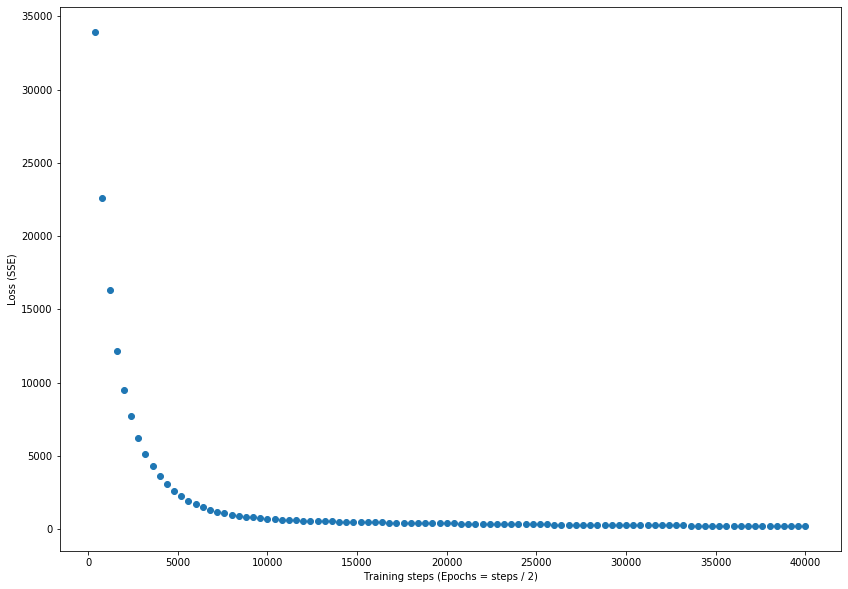

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x=training_steps, y=loss_values)
ax.set_xlabel('Training steps (Epochs = steps / 2)')
ax.set_ylabel('Loss (SSE)')
plt.savefig("windototal-and-weddata2.png", dpi=300)

In [26]:
pred = regressor.predict(input_fn=wx_input_fn(X_test, num_epochs=1, shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print('The Explained Variance: %.2f' % explained_variance_score(y_test, predictions))
print('The Mean Absolute Error: %.2f' % mean_absolute_error(y_test, predictions))
print('The Median Absolute Error: %.2f' % median_absolute_error(y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\userr\diss\modelTest\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.99
The Mean Absolute Error: 0.60
The Median Absolute Error: 0.50


In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))**0.5

0.8656685716922439